In [1]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import numpy.ma as ma #masked_array for recovering GridSearch results
import random
import math
import copy


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

# Supervised Learning - Classification

In this section we'll provide the following three ML model for classification:
- Random Forest
- K-Nearest Neighbors 
- Gaussian Naives Bayes





### Dataset preprocessing - Removal of correlated features

In [2]:
# working datasets

features_dict = {} #feature dictionary --> feature : description
with open("readme.txt", 'r') as f:
    for i, line in enumerate(f.readlines()):
        if (i >= 2):
            kv = line.split(':')
            features_dict[kv[0].strip()] = kv[1].strip()
            
features_list = list(features_dict.keys())

In [3]:
df_training = pd.read_csv("https_training.csv")
df_training['numerical_label'] = pd.Categorical(df_training['label']).codes

df_training

,_c_ack_cnt,_c_ack_cnt_p,_c_appdataB,_c_appdataT,_c_bytes_all,_c_bytes_retx,_c_bytes_uniq,_c_cwin_ini,_c_cwin_max,_c_cwin_min,...,_s_ttl_min,_s_win_0,_s_win_max,_s_win_min,_s_win_scl,_tls_session_stat,c_ip,time,label,numerical_label
0,8.0,4.0,569.0,522.003,1672.0,0.0,1672.0,517.0,590.0,51.0,...,59.0,0.0,31232.0,27680.0,9.0,1.0,67.32.225.92,1.561932e+09,krxd.net,12
1,10.0,7.0,275.0,39.504,636.0,0.0,636.0,181.0,362.0,1.0,...,59.0,0.0,29480.0,27680.0,0.0,0.0,67.32.181.213,1.561932e+09,_other,0
2,7.0,3.0,569.0,110.003,3325.0,0.0,3325.0,517.0,1435.0,51.0,...,59.0,0.0,34304.0,27680.0,9.0,1.0,67.32.225.92,1.561932e+09,contextweb.com,4
3,8.0,3.0,453.0,8.813,958.0,0.0,958.0,401.0,557.0,1.0,...,59.0,0.0,30208.0,27920.0,9.0,0.0,67.32.124.163,1.561932e+09,twitchcdn.net,24
4,6.0,2.0,0.0,0.000,452.0,0.0,452.0,401.0,401.0,1.0,...,59.0,0.0,29184.0,27920.0,9.0,0.0,67.32.124.163,1.561932e+09,twitchcdn.net,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147858,8.0,3.0,453.0,10.011,907.0,0.0,907.0,401.0,506.0,51.0,...,59.0,0.0,30208.0,27920.0,9.0,0.0,67.32.124.163,1.562018e+09,twitchcdn.net,24
147859,12.0,4.0,446.0,16.000,2068.0,0.0,2068.0,394.0,838.0,51.0,...,59.0,0.0,33792.0,27920.0,9.0,0.0,67.32.124.163,1.562018e+09,twitch.tv,23
147860,12.0,6.0,306.0,53.987,430.0,0.0,430.0,212.0,212.0,38.0,...,59.0,0.0,29184.0,27920.0,9.0,0.0,67.32.230.26,1.562019e+09,everesttech.net,6
147861,13.0,6.0,306.0,54.000,886.0,0.0,886.0,212.0,543.0,38.0,...,59.0,0.0,30208.0,27920.0,9.0,0.0,67.32.230.26,1.562019e+09,everesttech.net,6


In [4]:
df_test = pd.read_csv("https_test.csv")
df_test['numerical_label'] = pd.Categorical(df_test['label']).codes

df_test

,_c_ack_cnt,_c_ack_cnt_p,_c_appdataB,_c_appdataT,_c_bytes_all,_c_bytes_retx,_c_bytes_uniq,_c_cwin_ini,_c_cwin_max,_c_cwin_min,...,_s_ttl_min,_s_win_0,_s_win_max,_s_win_min,_s_win_scl,_tls_session_stat,c_ip,time,label,numerical_label
0,24.0,5.0,309.0,11.673,725.0,13.0,712.0,215.0,459.0,1.0,...,59.0,0.0,30208.0,27920.0,9.0,0.0,67.32.51.209,1.561932e+09,slack-edge.com,20
1,10.0,6.0,409.0,47.964,671.0,0.0,671.0,282.0,282.0,126.0,...,59.0,0.0,30208.0,27680.0,9.0,0.0,67.32.34.52,1.561932e+09,_other,0
2,10.0,6.0,410.0,36.464,729.0,0.0,729.0,283.0,320.0,1.0,...,59.0,0.0,30208.0,27680.0,9.0,0.0,67.32.34.52,1.561932e+09,_other,0
3,12.0,7.0,341.0,14.198,540.0,0.0,540.0,247.0,262.0,31.0,...,59.0,0.0,30208.0,27680.0,9.0,1.0,67.32.172.153,1.561932e+09,githubusercontent.com,11
4,25.0,6.0,309.0,20.617,725.0,13.0,712.0,215.0,459.0,38.0,...,59.0,0.0,30208.0,27920.0,9.0,0.0,67.32.239.251,1.561932e+09,slack-edge.com,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114575,27.0,7.0,611.0,16.013,2965.0,13.0,2952.0,517.0,2397.0,38.0,...,59.0,0.0,34816.0,27920.0,9.0,1.0,67.32.51.91,1.562018e+09,_other,0
114576,13.0,2.0,569.0,10.008,1425.0,6.0,1419.0,517.0,902.0,51.0,...,59.0,0.0,30720.0,27920.0,9.0,1.0,67.32.124.70,1.562018e+09,krxd.net,12
114577,7.0,3.0,611.0,24.000,997.0,0.0,997.0,517.0,517.0,93.0,...,59.0,0.0,30208.0,27680.0,9.0,1.0,67.32.35.141,1.562018e+09,_other,0
114578,7.0,3.0,0.0,0.000,610.0,0.0,610.0,517.0,517.0,93.0,...,59.0,0.0,29184.0,27920.0,9.0,1.0,67.32.124.70,1.562018e+09,krxd.net,12


In [5]:
dict_num_label = dict()
for x, y in df_training.iloc[:, -2:].values:
    dict_num_label[y] = x
dict_num_label

{12: 'krxd.net',
 0: '_other',
 4: 'contextweb.com',
 24: 'twitchcdn.net',
 23: 'twitch.tv',
 21: 'taboola.com',
 3: 'chartbeat.com',
 1: 'adnxs.com',
 6: 'everesttech.net',
 20: 'slack-edge.com',
 9: 'ftcdn.net',
 11: 'githubusercontent.com',
 13: 'newrelic.com',
 19: 'scdn.co',
 16: 'polyfill.io',
 22: 'twimg.com',
 18: 'reddit.com',
 14: 'outbrain.com',
 2: 'ads-twitter.com',
 15: 'pinterest.com',
 8: 'fastly.net',
 5: 'disqus.com',
 7: 'fastly-insights.com',
 25: 'vimeocdn.com',
 10: 'giphy.com',
 17: 'redd.it'}

In [11]:
### Data Preprocessing - ELIMINATION OF HIGHLY CORRELATED FEATURES!!!

# splitting training set 
X, X_val, y, y_val = train_test_split( # X -> features, y -> labels
    df_training.iloc[:, :-4], # X
    df_training['numerical_label'], # y
    stratify = df_training['numerical_label'], # stratify the dataset based on class labels
    train_size = 0.7, # percentage of training set
    random_state = 15 
)

# Standardize data
scaler = StandardScaler()
scaler.fit(X)


X_s = pd.DataFrame(scaler.transform(X), columns = features_list[:-3])
X_val_s = pd.DataFrame(scaler.transform(X_val), columns = features_list[:-3])
X_test_s = pd.DataFrame(scaler.transform(df_test.iloc[:, :-4]), columns = features_list[:-3])

y_test = df_test["numerical_label"]

correlation_matrix = X_s.corr().abs()




def correlated_features_to_remove(correlation_matrix):
    to_delete = []
    for i, f1 in enumerate(correlation_matrix):
        for j, f2 in enumerate(correlation_matrix) :
            if (i!=j and correlation_matrix.iloc[i, j]>0.8 and (f2 not in to_delete)):
                to_delete.append(f1)
                break
    return to_delete

to_delete = correlated_features_to_remove(correlation_matrix)

print(len(to_delete), 'features are removed')

X_s.drop(columns = to_delete, inplace = True)
X_val_s.drop(columns = to_delete, inplace = True)
X_test_s.drop(columns = to_delete, inplace = True)

45 features are removed


##  Model Training with default Parameters and Performance Evaluation

In [7]:
%%time
rf = RandomForestClassifier() 

rf.fit(X_s, y)
predictions_train = rf.predict(X_s)
predictions_val = rf.predict(X_val_s)
predictions_test = rf.predict(X_test_s)

CPU times: user 50.3 s, sys: 576 ms, total: 50.8 s
Wall time: 50.8 s


	CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (TRAIN-SET):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24558
           1       1.00      1.00      1.00      2687
           2       1.00      1.00      1.00       928
           3       1.00      1.00      1.00       989
           4       1.00      1.00      1.00      1977
           5       1.00      1.00      1.00      2221
           6       1.00      1.00      1.00      2386
           7       1.00      1.00      1.00       916
           8       1.00      1.00      1.00      1308
           9       1.00      1.00      1.00      2418
          10       1.00      1.00      1.00      2720
          11       1.00      1.00      1.00      2990
          12       1.00      1.00      1.00      7801
          13       1.00      1.00      1.00      1527
          14       1.00      1.00      1.00      3946
          15       1.00      1.00      1.00      1377
          16       1

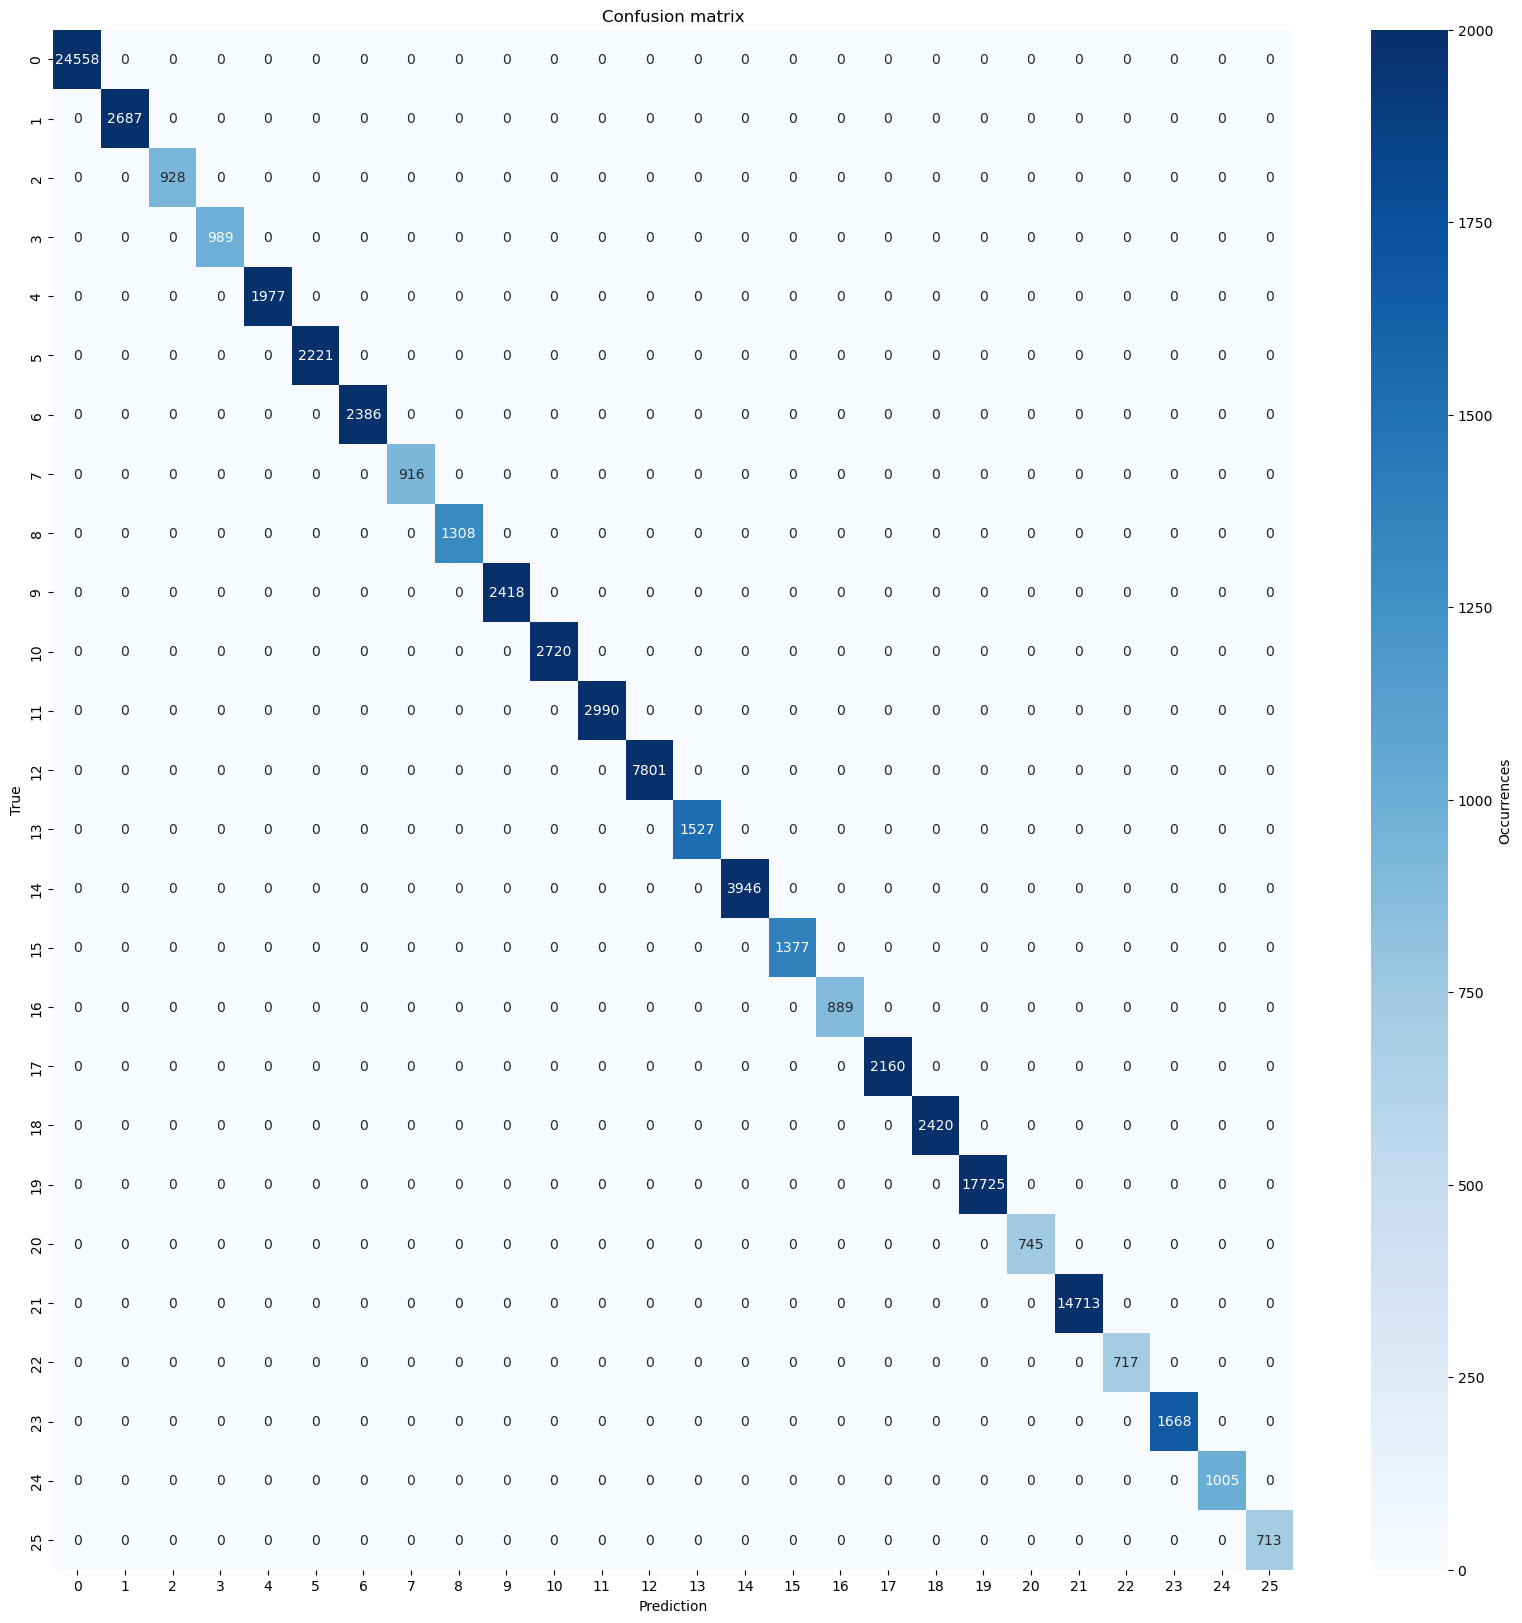

	CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (VAL-SET):
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     10525
           1       0.96      0.92      0.94      1152
           2       0.97      0.85      0.91       397
           3       0.95      0.88      0.91       424
           4       0.97      0.89      0.93       847
           5       0.94      0.77      0.85       952
           6       0.96      0.90      0.93      1022
           7       0.99      0.92      0.96       393
           8       0.92      0.75      0.82       561
           9       1.00      0.99      0.99      1037
          10       0.97      0.89      0.93      1166
          11       0.92      0.92      0.92      1281
          12       0.92      0.96      0.94      3343
          13       0.95      0.81      0.88       655
          14       0.83      0.65      0.73      1691
          15       0.95      0.65      0.77       590
          16       0.9

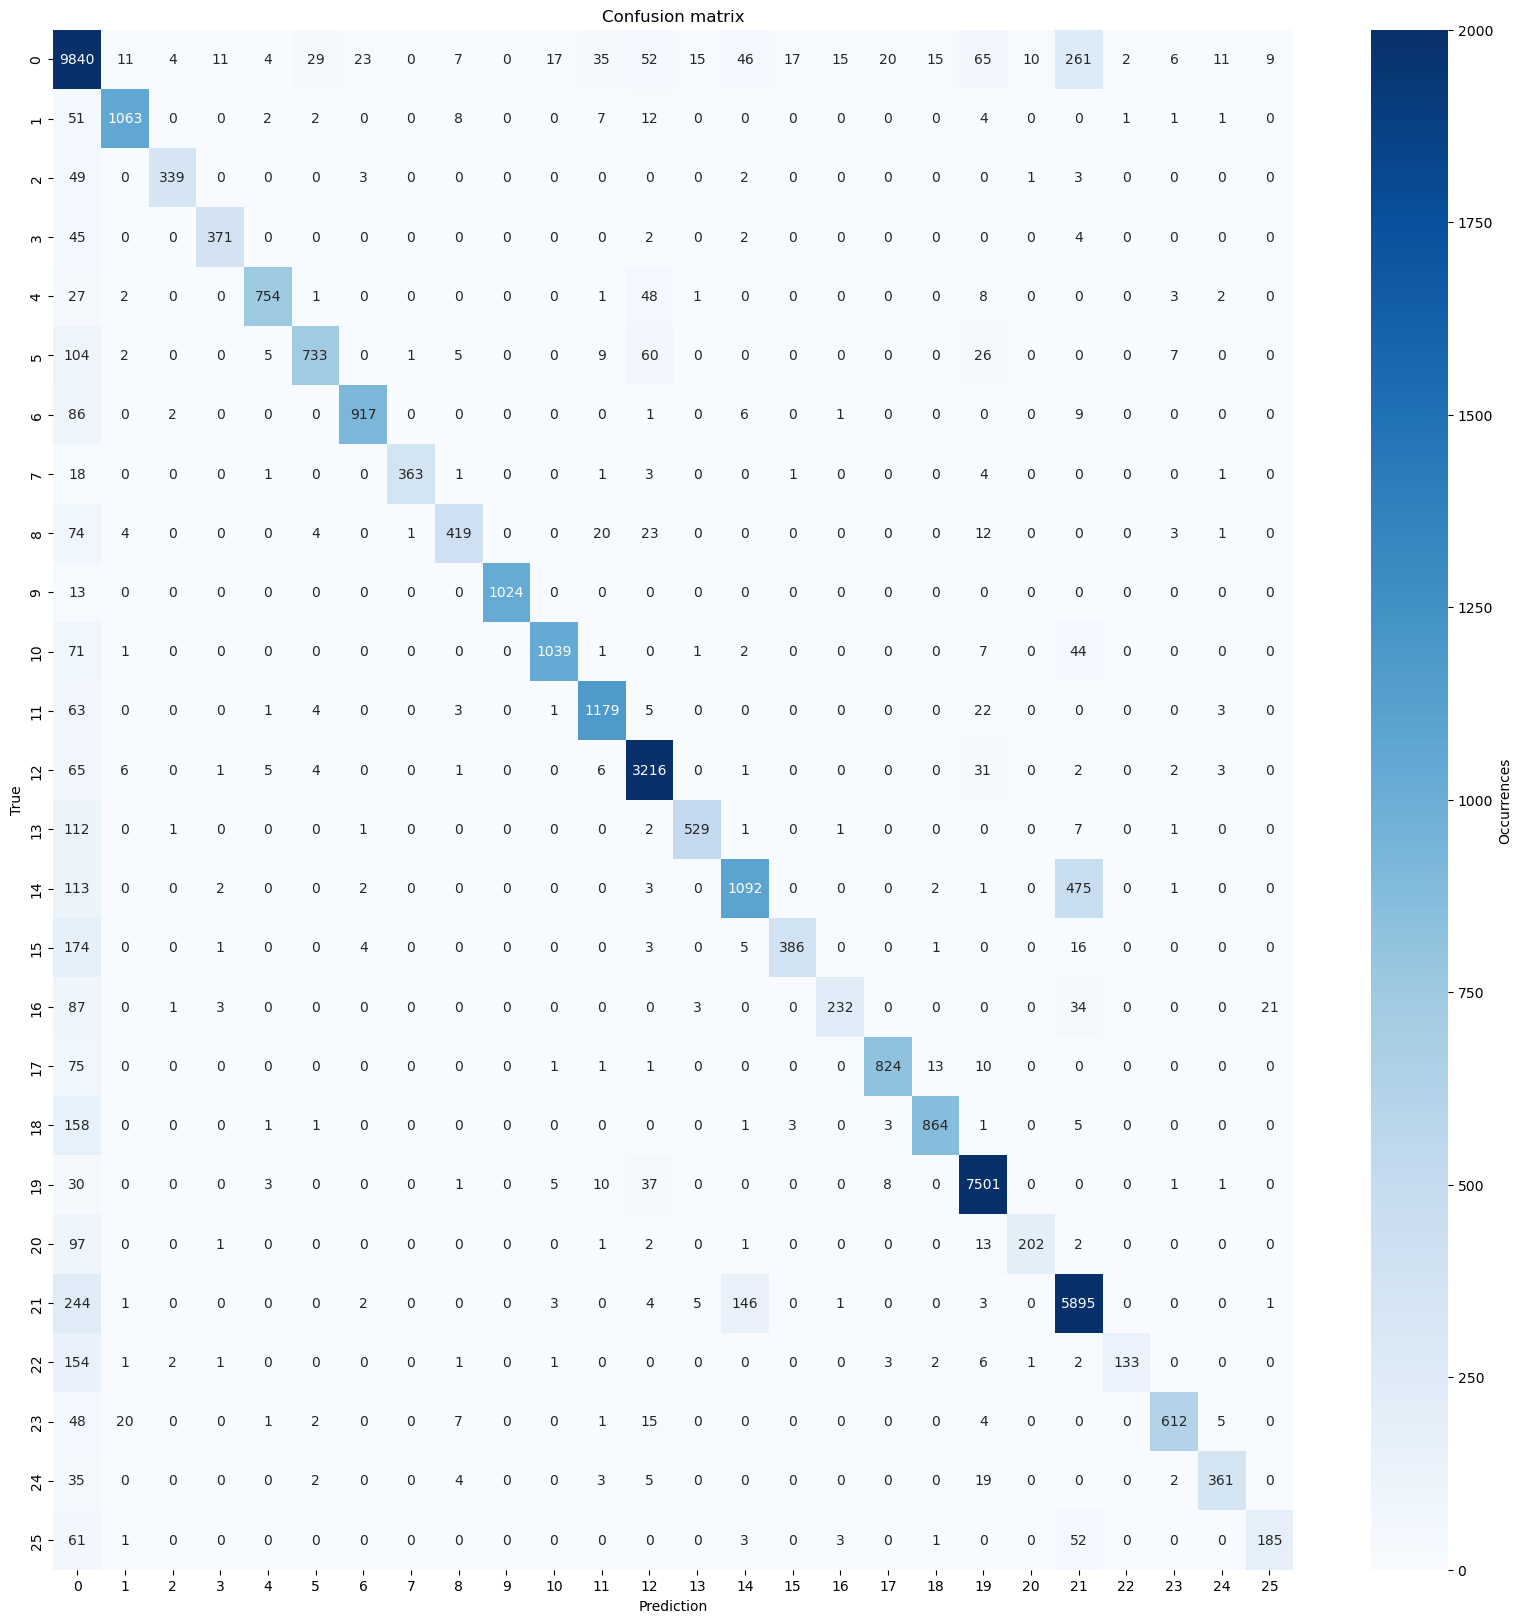

	CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (TEST-SET):
              precision    recall  f1-score   support

           0       0.75      0.85      0.80     34777
           1       0.89      0.81      0.85      2942
           2       0.95      0.73      0.82      1135
           3       0.94      0.90      0.92      1717
           4       0.86      0.81      0.84      2383
           5       0.78      0.56      0.66      3246
           6       0.94      0.81      0.87      2894
           7       0.99      0.82      0.89       686
           8       0.79      0.46      0.58      1455
           9       0.99      0.94      0.96      1607
          10       0.91      0.80      0.85      1730
          11       0.84      0.73      0.78      4477
          12       0.83      0.92      0.88     11171
          13       0.92      0.73      0.82      1604
          14       0.68      0.61      0.64      4426
          15       0.93      0.46      0.62      1542
          16       0.

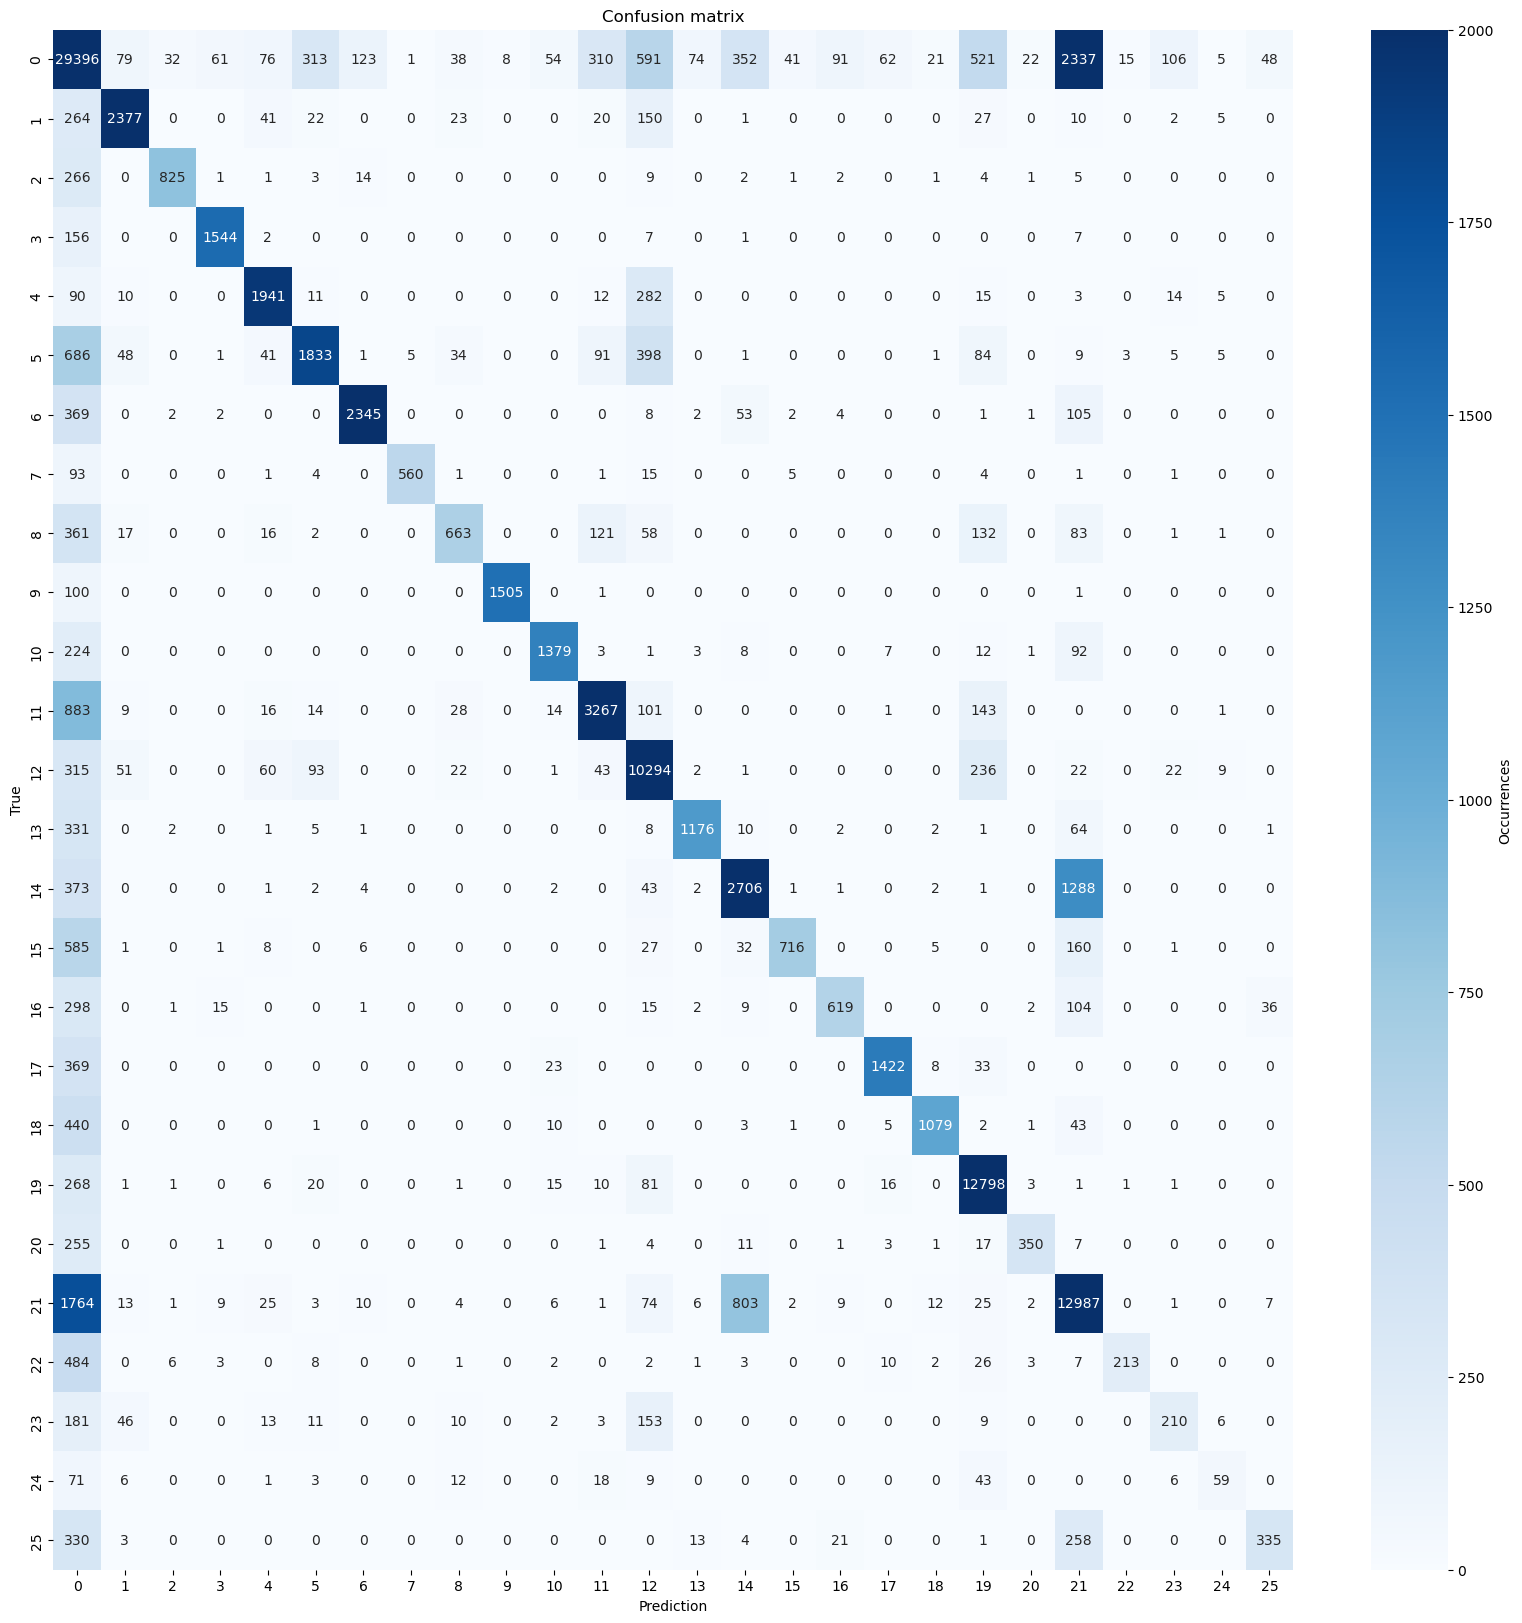

In [14]:
###--- RANDOM FOREST CLASSIFIER (TRAIN_SET) ---###
print("\tCLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (TRAIN-SET):")


# get the confusion matrix of test set
confusion_test = confusion_matrix(y, predictions_train)
print(classification_report(y, predictions_train))

# visualize the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(confusion_test, 
            cmap='Blues', 
            annot=True, 
            fmt='d',
            cbar_kws={'label':'Occurrences'}, 
            vmin=0, 
            vmax=2000,
           )
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix - train set')
plt.show()




###--- RANDOM FOREST CLASSIFIER (VAL_SET) ---###
print("\tCLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (VAL-SET):")


# get the confusion matrix of test set
confusion_test = confusion_matrix(y_val, predictions_val)
print(classification_report(y_val, predictions_val))

# visualize the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(confusion_test, 
            cmap='Blues', 
            annot=True,
            fmt='d',
            cbar_kws={'label':'Occurrences'}, 
            vmin=0, 
            vmax=2000,
           )
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix - validation set')
plt.show()

###--- RANDOM FOREST CLASSIFIER (TEST_SET) ---###
print("\tCLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (TEST-SET):")


# get the confusion matrix of test set
confusion_test = confusion_matrix(y_test, predictions_test)
print(classification_report(y_test, predictions_test))

# visualize the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(confusion_test, 
            cmap='Blues', 
            annot=True, 
            fmt='d',
            cbar_kws={'label':'Occurrences'}, 
            vmin=0, 
            vmax=2000,
           )
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix - test set')
plt.show()

## Validation Curve

In [7]:
%%time
# Create the RandomForestClassifier; 
rf_classifier = RandomForestClassifier() #15.30

# Generate validation curve #20.40
train_scores, val_scores = validation_curve(
    rf_classifier, X_s, y, param_name="n_estimators", param_range=range(100, 400, 50),
    scoring="accuracy", cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)



CPU times: user 44min 50s, sys: 28.4 s, total: 45min 18s
Wall time: 45min 19s


In [8]:
train_scores 
#array of n arrays for each n_estimator of 5 accuracy values for each split

array([[1.        , 1.        , 1.        , 0.99998792, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [9]:
val_scores
#array of n arrays for each n_estimator of 5 accuracy values for each split

array([[0.89589875, 0.89251727, 0.89488431, 0.89024685, 0.89149758],
       [0.89831409, 0.89304864, 0.894836  , 0.89005362, 0.89410628],
       [0.89831409, 0.89551229, 0.89614028, 0.8920342 , 0.89347826],
       [0.8983624 , 0.89618859, 0.89604367, 0.89246896, 0.89483092],
       [0.8983624 , 0.89440124, 0.89589875, 0.8927588 , 0.89449275],
       [0.9004879 , 0.8941597 , 0.89643012, 0.8941114 , 0.89463768]])

In [13]:
### recovering previous results
train_scores = np.array([[1.        , 1.        , 1.        , 0.99998792, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

val_scores = np.array([[0.89589875, 0.89251727, 0.89488431, 0.89024685, 0.89149758],
       [0.89831409, 0.89304864, 0.894836  , 0.89005362, 0.89410628],
       [0.89831409, 0.89551229, 0.89614028, 0.8920342 , 0.89347826],
       [0.8983624 , 0.89618859, 0.89604367, 0.89246896, 0.89483092],
       [0.8983624 , 0.89440124, 0.89589875, 0.8927588 , 0.89449275],
       [0.9004879 , 0.8941597 , 0.89643012, 0.8941114 , 0.89463768]])

In [14]:
info_accuracy_train = []
info_accuracy_val = []
best_val_score = 0
best_parameter = -1

for n, param in enumerate(range(100, 400, 50)): # range of 4 n_estimators
    #test_scores
    acc_mean_train = train_scores[n].mean()
    acc_min_train = train_scores[n].min()
    acc_max_train = train_scores[n].max()
    info_accuracy_train.append((acc_mean_train, acc_min_train, acc_max_train))
    #val_scores
    acc_mean_val = val_scores[n].mean()
    acc_min_val = val_scores[n].min()
    acc_max_val = val_scores[n].max()
    if (acc_mean_val>best_val_score):
        best_val_score = acc_mean_val
        best_parameter = param
    info_accuracy_val.append((acc_mean_val, acc_min_val, acc_max_val))


info_accuracy_val
   



[(0.8930089520000001, 0.89024685, 0.89589875),
 (0.894071726, 0.89005362, 0.89831409),
 (0.895095824, 0.8920342, 0.89831409),
 (0.8955789079999998, 0.89246896, 0.8983624),
 (0.895182788, 0.8927588, 0.8983624),
 (0.8959653599999999, 0.8941114, 0.9004879)]

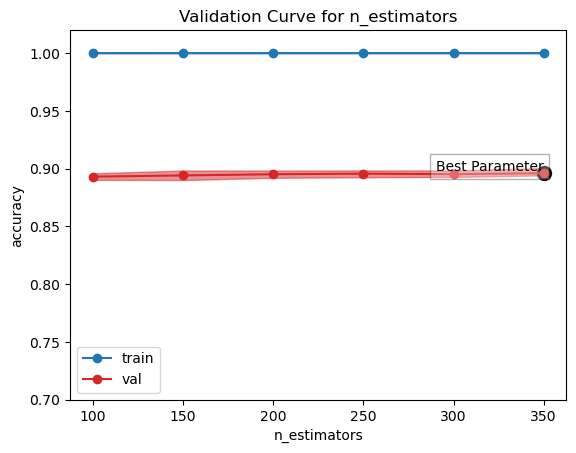

In [15]:
plt.figure()
x =  range(100, 400, 50)
plt.plot(x, [info_accuracy_train[i][0] for i in range(len(x))],'-o', color='tab:blue', label='train')
plt.fill_between(
    x, 
    [info_accuracy_train[i][1] for i in range(len(x))], 
    [info_accuracy_train[i][2] for i in range(len(x))], 
    alpha=0.5, 
    color='tab:blue'
)
plt.plot(x, [info_accuracy_val[i][0] for i in range(len(x))],'-o', color='tab:red', label='val')
plt.fill_between(
    x, 
    [info_accuracy_val[i][1] for i in range(len(x))], 
    [info_accuracy_val[i][2] for i in range(len(x))], 
    alpha=0.5, 
    color='tab:red'
)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Validation Curve for n_estimators')
plt.ylim(0.7, 1.02)
plt.scatter(best_parameter, best_val_score, marker='o', color='black',s=100)
plt.text(best_parameter, best_val_score, "Best Parameter", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
plt.xticks(x, labels=range(100, 400, 50))
plt.legend()
plt.show()

In [32]:
%%time
# Create the RandomForestClassifier; 
rf_classifier = RandomForestClassifier() #20.14

# Generate validation curve #20.40
train_scores, val_scores = validation_curve(
    rf_classifier, X_s, y, param_name="n_estimators", param_range=range(10, 110, 10),
    scoring="accuracy", cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
)



CPU times: user 16min 38s, sys: 8.9 s, total: 16min 47s
Wall time: 16min 47s


In [36]:
train_scores 
#array of n arrays for each n_estimator of 5 accuracy values for each split

array([[0.99646148, 0.9965581 , 0.9965581 , 0.9965581 , 0.99671513],
       [0.99920293, 0.99946862, 0.99949277, 0.99944446, 0.99939616],
       [0.999843  , 0.99985508, 0.99983092, 0.99983092, 0.99985508],
       [0.99991546, 0.99991546, 0.99997585, 0.99986715, 0.99987923],
       [0.99998792, 0.99998792, 0.99997585, 0.99993962, 0.99997585],
       [0.99998792, 1.        , 0.99993962, 0.99996377, 1.        ],
       [0.99998792, 1.        , 0.99998792, 0.99998792, 1.        ],
       [1.        , 1.        , 1.        , 0.99998792, 1.        ],
       [1.        , 1.        , 0.99998792, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

In [37]:
val_scores
#array of n arrays for each n_estimator of 5 accuracy values for each split

array([[0.86131105, 0.86203565, 0.86189073, 0.85643206, 0.86323671],
       [0.88077871, 0.87715569, 0.87406405, 0.87739723, 0.87903382],
       [0.88947394, 0.8835322 , 0.88304913, 0.88507802, 0.8863285 ],
       [0.89097145, 0.88787981, 0.88816965, 0.88522294, 0.88768116],
       [0.89304864, 0.88816965, 0.89000531, 0.88647891, 0.88966184],
       [0.89319357, 0.89000531, 0.8906333 , 0.88657553, 0.89120773],
       [0.8955606 , 0.89116468, 0.89222743, 0.89024685, 0.89043478],
       [0.89454616, 0.89285542, 0.89280711, 0.88870103, 0.89033816],
       [0.89498092, 0.8920342 , 0.89266219, 0.89111637, 0.89183575],
       [0.89478769, 0.89324187, 0.89406309, 0.88903918, 0.89352657]])

In [38]:
### recovering previous results
train_scores = np.array([[0.99646148, 0.9965581 , 0.9965581 , 0.9965581 , 0.99671513],
       [0.99920293, 0.99946862, 0.99949277, 0.99944446, 0.99939616],
       [0.999843  , 0.99985508, 0.99983092, 0.99983092, 0.99985508],
       [0.99991546, 0.99991546, 0.99997585, 0.99986715, 0.99987923],
       [0.99998792, 0.99998792, 0.99997585, 0.99993962, 0.99997585],
       [0.99998792, 1.        , 0.99993962, 0.99996377, 1.        ],
       [0.99998792, 1.        , 0.99998792, 0.99998792, 1.        ],
       [1.        , 1.        , 1.        , 0.99998792, 1.        ],
       [1.        , 1.        , 0.99998792, 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

val_scores = np.array([[0.86131105, 0.86203565, 0.86189073, 0.85643206, 0.86323671],
       [0.88077871, 0.87715569, 0.87406405, 0.87739723, 0.87903382],
       [0.88947394, 0.8835322 , 0.88304913, 0.88507802, 0.8863285 ],
       [0.89097145, 0.88787981, 0.88816965, 0.88522294, 0.88768116],
       [0.89304864, 0.88816965, 0.89000531, 0.88647891, 0.88966184],
       [0.89319357, 0.89000531, 0.8906333 , 0.88657553, 0.89120773],
       [0.8955606 , 0.89116468, 0.89222743, 0.89024685, 0.89043478],
       [0.89454616, 0.89285542, 0.89280711, 0.88870103, 0.89033816],
       [0.89498092, 0.8920342 , 0.89266219, 0.89111637, 0.89183575],
       [0.89478769, 0.89324187, 0.89406309, 0.88903918, 0.89352657]])

In [35]:
info_accuracy_train = []
info_accuracy_val = []
best_val_score = 0
best_parameter = -1

for n, param in enumerate(range(10, 110, 10)): # range of 4 n_estimators
    #test_scores
    acc_mean_train = train_scores[n].mean()
    acc_min_train = train_scores[n].min()
    acc_max_train = train_scores[n].max()
    info_accuracy_train.append((acc_mean_train, acc_min_train, acc_max_train))
    #val_scores
    acc_mean_val = val_scores[n].mean()
    acc_min_val = val_scores[n].min()
    acc_max_val = val_scores[n].max()
    if (acc_mean_val>best_val_score):
        best_val_score = acc_mean_val
        best_parameter = param
    info_accuracy_val.append((acc_mean_val, acc_min_val, acc_max_val))


info_accuracy_val
   



[(0.8609812400000001, 0.85643206, 0.86323671),
 (0.8776859, 0.87406405, 0.88077871),
 (0.8854923579999999, 0.88304913, 0.88947394),
 (0.887985002, 0.88522294, 0.89097145),
 (0.8894728700000002, 0.88647891, 0.89304864),
 (0.8903230879999999, 0.88657553, 0.89319357),
 (0.891926868, 0.89024685, 0.8955606),
 (0.891849576, 0.88870103, 0.89454616),
 (0.8925258859999999, 0.89111637, 0.89498092),
 (0.89293168, 0.88903918, 0.89478769)]

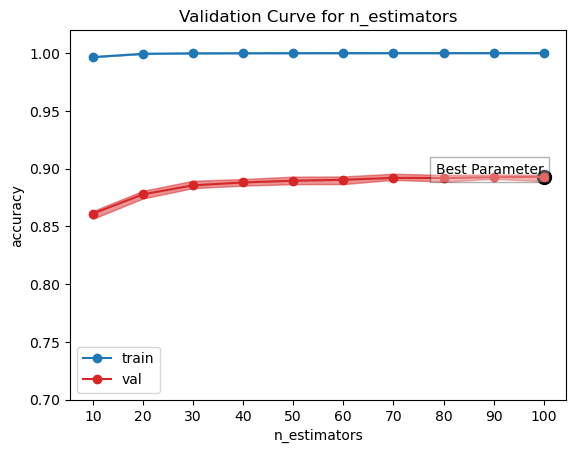

In [31]:
plt.figure()
x =  range(10, 110, 10)
plt.plot(x, [info_accuracy_train[i][0] for i in range(len(x))],'-o', color='tab:blue', label='train')
plt.fill_between(
    x, 
    [info_accuracy_train[i][1] for i in range(len(x))], 
    [info_accuracy_train[i][2] for i in range(len(x))], 
    alpha=0.5, 
    color='tab:blue'
)
plt.plot(x, [info_accuracy_val[i][0] for i in range(len(x))],'-o', color='tab:red', label='val')
plt.fill_between(
    x, 
    [info_accuracy_val[i][1] for i in range(len(x))], 
    [info_accuracy_val[i][2] for i in range(len(x))], 
    alpha=0.5, 
    color='tab:red'
)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('Validation Curve for n_estimators')
plt.ylim(0.7, 1.02)
plt.scatter(best_parameter, best_val_score, marker='o', color='black',s=100)
plt.text(best_parameter, best_val_score, "Best Parameter", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
plt.xticks(x, labels=range(10, 110, 10))
plt.legend()
plt.show()

## Grid Search

In [110]:
n_features = X_s.shape[1] 
param_grid = {
    'n_estimators': range(10, 120, 20),  # range of n_estimators
    'max_features': ["sqrt", "log2", int(n_features/2)]  # range of max_features
}

In [53]:
%%time 
# Create the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Grid Search
clf = GridSearchCV(rf_classifier, param_grid) # 16.11
clf.fit(X_s, y)


CPU times: user 57min 59s, sys: 16.3 s, total: 58min 15s
Wall time: 58min 16s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', 37],
                         'n_estimators': range(10, 120, 20)})

In [54]:
clf.cv_results_

{'mean_fit_time': array([  3.04911823,   9.12687845,  15.15123429,  21.55735507,
         27.16687169,  33.39400148,   2.44602551,   7.41104026,
         12.34771996,  17.0873004 ,  24.2906548 ,  31.26109695,
         12.38959374,  37.66770253,  62.36557646,  83.91193013,
        109.15347762, 144.34827833]),
 'std_fit_time': array([0.0337546 , 0.07261407, 0.18342208, 0.22943352, 0.24652382,
        0.29647718, 0.05999594, 0.06409023, 0.09798949, 0.11196438,
        1.00871457, 0.25355554, 0.27587053, 0.45494811, 0.78944856,
        2.53568752, 5.47012447, 1.72278577]),
 'mean_score_time': array([0.08453503, 0.24821858, 0.39691691, 0.56576271, 0.70378323,
        0.87426186, 0.08980179, 0.25436668, 0.42164874, 0.58180366,
        0.84164939, 1.21379957, 0.0823926 , 0.22647133, 0.36343966,
        0.47268319, 0.68693151, 0.86776843]),
 'std_score_time': array([0.00164987, 0.00751843, 0.00888484, 0.01994141, 0.01280173,
        0.02844647, 0.00107538, 0.00225973, 0.00479886, 0.00389233,


In [15]:
#### recovering previous results
cv_results ={'mean_fit_time': np.array([  3.04911823,   9.12687845,  15.15123429,  21.55735507,
         27.16687169,  33.39400148,   2.44602551,   7.41104026,
         12.34771996,  17.0873004 ,  24.2906548 ,  31.26109695,
         12.38959374,  37.66770253,  62.36557646,  83.91193013,
        109.15347762, 144.34827833]),
 'std_fit_time': np.array([0.0337546 , 0.07261407, 0.18342208, 0.22943352, 0.24652382,
        0.29647718, 0.05999594, 0.06409023, 0.09798949, 0.11196438,
        1.00871457, 0.25355554, 0.27587053, 0.45494811, 0.78944856,
        2.53568752, 5.47012447, 1.72278577]),
 'mean_score_time': np.array([0.08453503, 0.24821858, 0.39691691, 0.56576271, 0.70378323,
        0.87426186, 0.08980179, 0.25436668, 0.42164874, 0.58180366,
        0.84164939, 1.21379957, 0.0823926 , 0.22647133, 0.36343966,
        0.47268319, 0.68693151, 0.86776843]),
 'std_score_time': np.array([0.00164987, 0.00751843, 0.00888484, 0.01994141, 0.01280173,
        0.02844647, 0.00107538, 0.00225973, 0.00479886, 0.00389233,
        0.07357978, 0.04329888, 0.00452651, 0.02312331, 0.02305449,
        0.01980792, 0.06079221, 0.03669501]),
 'param_max_features': ma.masked_array(data=['sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'sqrt', 'log2',
                    'log2', 'log2', 'log2', 'log2', 'log2', 37, 37, 37, 37,
                    37, 37],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': ma.masked_array(data=[10, 30, 50, 70, 90, 110, 10, 30, 50, 70, 90, 110, 10,
                    30, 50, 70, 90, 110],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'sqrt', 'n_estimators': 10},
  {'max_features': 'sqrt', 'n_estimators': 30},
  {'max_features': 'sqrt', 'n_estimators': 50},
  {'max_features': 'sqrt', 'n_estimators': 70},
  {'max_features': 'sqrt', 'n_estimators': 90},
  {'max_features': 'sqrt', 'n_estimators': 110},
  {'max_features': 'log2', 'n_estimators': 10},
  {'max_features': 'log2', 'n_estimators': 30},
  {'max_features': 'log2', 'n_estimators': 50},
  {'max_features': 'log2', 'n_estimators': 70},
  {'max_features': 'log2', 'n_estimators': 90},
  {'max_features': 'log2', 'n_estimators': 110},
  {'max_features': 37, 'n_estimators': 10},
  {'max_features': 37, 'n_estimators': 30},
  {'max_features': 37, 'n_estimators': 50},
  {'max_features': 37, 'n_estimators': 70},
  {'max_features': 37, 'n_estimators': 90},
  {'max_features': 37, 'n_estimators': 110}],
 'split0_test_score': np.array([0.85570745, 0.88411188, 0.89087484, 0.89213081, 0.89126129,
        0.89319357, 0.83928313, 0.86623835, 0.87213178, 0.87657601,
        0.8786049 , 0.88077871, 0.91159847, 0.92285397, 0.92439979,
        0.92570407, 0.92700836, 0.92807111]),
 'split1_test_score': np.array([0.85164968, 0.88227622, 0.88754166, 0.88807304, 0.89053669,
        0.8906333 , 0.83503212, 0.86957152, 0.87285638, 0.87739723,
        0.87696247, 0.87817014, 0.90918313, 0.92019709, 0.92299889,
        0.92246751, 0.92328873, 0.92430317]),
 'split2_test_score': np.array([0.8581228 , 0.88164823, 0.88701029, 0.8885078 , 0.8899087 ,
        0.89391817, 0.83401768, 0.87285638, 0.87391913, 0.87532003,
        0.87961934, 0.87981257, 0.91285445, 0.92367518, 0.92401333,
        0.92570407, 0.92599391, 0.92700836]),
 'split3_test_score': np.array([0.8616492 , 0.8856577 , 0.89155113, 0.89198589, 0.89580214,
        0.89546399, 0.84870296, 0.87304961, 0.87686585, 0.8793295 ,
        0.88309743, 0.88473987, 0.91285445, 0.92604222, 0.92845756,
        0.92821603, 0.92927878, 0.93000338]),
 'split4_test_score': np.array([0.86120773, 0.8873913 , 0.89202899, 0.89289855, 0.89512077,
        0.89700483, 0.8384058 , 0.86961353, 0.87850242, 0.87942029,
        0.88227053, 0.88410628, 0.90985507, 0.92536232, 0.92536232,
        0.92574879, 0.92652174, 0.9263285 ]),
 'mean_test_score': np.array([0.85766737, 0.88421707, 0.88980138, 0.89071922, 0.89252592,
        0.89404277, 0.83908834, 0.87026588, 0.87485511, 0.87760861,
        0.88011093, 0.88152151, 0.91126912, 0.92362616, 0.92504638,
        0.9255681 , 0.9264183 , 0.9271429 ]),
 'std_test_score': np.array([0.00370541, 0.00212264, 0.00210108, 0.00201192, 0.0024443 ,
        0.00215197, 0.00519825, 0.00251351, 0.00243448, 0.00158696,
        0.0022806 , 0.00251963, 0.00151565, 0.00205955, 0.0018662 ,
        0.00182728, 0.00192434, 0.00188623]),
 'rank_test_score': np.array([17, 11, 10,  9,  8,  7, 18, 16, 15, 14, 13, 12,  6,  5,  4,  3,  2,
         1], dtype= 'int32')}

In [26]:
for params in cv_results["params"]:
    print(list(params.values())

['sqrt', 10]
['sqrt', 30]
['sqrt', 50]
['sqrt', 70]
['sqrt', 90]
['sqrt', 110]
['log2', 10]
['log2', 30]
['log2', 50]
['log2', 70]
['log2', 90]
['log2', 110]
[37, 10]
[37, 30]
[37, 50]
[37, 70]
[37, 90]
[37, 110]


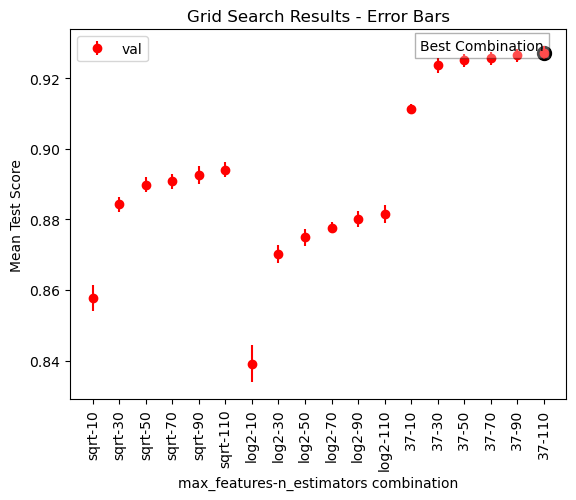

In [35]:
# Access the relevant information from cv_results
param_values = ["%s-%s" % (list(params.values())[0], list(params.values())[1]) for params in cv_results['params']]
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

idx_best = np.argmax(cv_results["mean_test_score"])
acc_max = cv_results["mean_test_score"][idx_best]
best_combination = cv_results['params'][idx_best]

# Convert to numpy arrays
param_values = np.array(param_values)
mean_test_scores = np.array(mean_test_scores)
std_test_scores = np.array(std_test_scores)

idx_best = np.argmax(cv_results["mean_test_score"])
acc_max = cv_results["mean_test_score"][idx_best]

# Plotting
plt.errorbar(range(len(param_values)), mean_test_scores, yerr=std_test_scores, marker='o', label='val', linestyle=' ', color='Red')
plt.xticks(range(len(param_values)), [str(params) for params in param_values], rotation='vertical')  # Aggiunto per etichettare le barre con le combinazioni di parametri
plt.xlabel('max_features-n_estimators combination')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results - Error Bars')

plt.scatter(idx_best, acc_max, marker='o', color='black',s=100)
plt.text(idx_best, acc_max, "Best Combination", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
plt.legend()

plt.show()


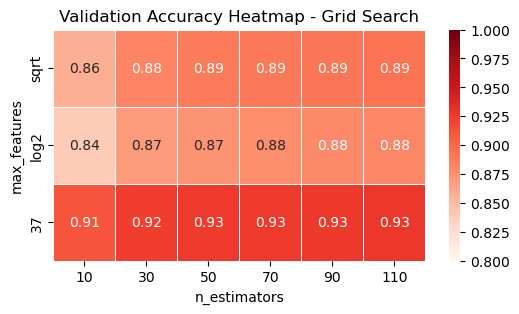

In [117]:
accuracy_map = pd.DataFrame(columns = param_grid['n_estimators'], index = param_grid['max_features'])
for i, param in enumerate(cv_results["params"]):
    accuracy_map.loc[param["max_features"], param['n_estimators']] = cv_results['mean_test_score'][i]

accuracy_map = accuracy_map.astype(float)

plt.figure(figsize=(6, 3))
sns.heatmap(accuracy_map, 
            annot=True, 
            cmap='Reds', 
            fmt='.2f', 
            linewidths=.5, 
            vmin = 0.8, 
            vmax = 1.0)
plt.title('Validation Accuracy Heatmap - Grid Search')
plt.xlabel('n_estimators')
plt.ylabel('max_features')
plt.show()


In [114]:
best_combination

{'max_features': 37, 'n_estimators': 110}

## LEARNING CURVE

In [46]:
### Now we need to use the entire training dataset for learning curve 
# Standardize data
scaler = StandardScaler()
scaler.fit(X)

# X --> X_learningCurve_s
X_learningCurve_s = df_training.iloc[:, :-4]
X_learningCurve_s = pd.DataFrame(scaler.transform(X_learningCurve_s), columns = features_list[:-3])
y_learningCurve = df_training["numerical_label"]

# Removal of high correlated features
correlation_matrix = X_s.corr().abs()
to_delete = correlated_features_to_remove(correlation_matrix)
X_learningCurve_s.drop(columns = to_delete, inplace = True)
print(len(to_delete), 'features are removed')

0 features are removed


In [47]:
%%time
# Create the RandomForestClassifier with best combination's parameters previously found
rf = RandomForestClassifier(
    ####---best parameters---###
    n_estimators = best_combination['n_estimators'],
    max_features = best_combination['max_features']
)

train_sizes, train_scores, val_scores = learning_curve(
    rf, X_learningCurve_s, y_learningCurve, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    train_sizes=np.arange(0.1, 1.0, 0.1), scoring="accuracy"
)

CPU times: user 1h 18min 20s, sys: 2.28 s, total: 1h 18min 23s
Wall time: 1h 18min 23s


In [48]:
train_sizes

array([ 11829,  23658,  35487,  47316,  59145,  70974,  82803,  94632,
       106461])

In [49]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99997887, 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99998943, 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.99999061]])

In [50]:
val_scores

array([[0.83190748, 0.82822169, 0.83312481, 0.83315298, 0.82581496],
       [0.872857  , 0.86572211, 0.87109864, 0.87596375, 0.87004599],
       [0.89618909, 0.89202989, 0.89243567, 0.89645611, 0.89277019],
       [0.9109999 , 0.90427079, 0.9068407 , 0.90768294, 0.90643176],
       [0.92009603, 0.9149224 , 0.9151591 , 0.91661031, 0.91407412],
       [0.92986846, 0.92520204, 0.92560782, 0.9268903 , 0.92364399],
       [0.93568458, 0.93115342, 0.93297941, 0.93443122, 0.93219938],
       [0.94075677, 0.93632706, 0.93832212, 0.93754227, 0.93591911],
       [0.94447638, 0.93991141, 0.94129781, 0.94149872, 0.94136345]])

In [51]:
print("New data ^^^^^")

New data ^^^^^


In [10]:
### recovering previous results
train_sizes = np.array([ 11829,  23658,  35487,  47316,  59145,  70974,  82803,  94632,
       106461])
train_scores = np.array([[1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99997887, 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99998943, 1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 0.99999061]])

val_scores = np.array([[0.83190748, 0.82822169, 0.83312481, 0.83315298, 0.82581496],
       [0.872857  , 0.86572211, 0.87109864, 0.87596375, 0.87004599],
       [0.89618909, 0.89202989, 0.89243567, 0.89645611, 0.89277019],
       [0.9109999 , 0.90427079, 0.9068407 , 0.90768294, 0.90643176],
       [0.92009603, 0.9149224 , 0.9151591 , 0.91661031, 0.91407412],
       [0.92986846, 0.92520204, 0.92560782, 0.9268903 , 0.92364399],
       [0.93568458, 0.93115342, 0.93297941, 0.93443122, 0.93219938],
       [0.94075677, 0.93632706, 0.93832212, 0.93754227, 0.93591911],
       [0.94447638, 0.93991141, 0.94129781, 0.94149872, 0.94136345]])

In [52]:
info_accuracy_train = []
info_accuracy_val = []

best_val_score = 0
best_proportion = 0

for n, train_proportion in enumerate(np.arange(0.1, 1.0, 0.1)): 
    #test_scores
    acc_mean_train = train_scores[n].mean()
    acc_min_train = train_scores[n].min()
    acc_max_train = train_scores[n].max()
    info_accuracy_train.append((acc_mean_train, acc_min_train, acc_max_train))
    #val_scores
    acc_mean_val = val_scores[n].mean()
    acc_min_val = val_scores[n].min()
    acc_max_val = val_scores[n].max()
    if (acc_mean_val>best_val_score):
        best_val_score = acc_mean_val
        best_proportion = train_proportion
    info_accuracy_val.append((acc_mean_val, acc_min_val, acc_max_val))


info_accuracy_val

[(0.8304443848641846, 0.8258149600973894, 0.8331529825510618),
 (0.8711374971070838, 0.8657221113853854, 0.8759637494927635),
 (0.893976189269233, 0.892029892131336, 0.8964561071283647),
 (0.9072452176965685, 0.904270787542691, 0.9109998985561154),
 (0.9161723916033626, 0.9140741241715136, 0.9200960335441112),
 (0.926242522126867, 0.923643987555796, 0.9298684610962702),
 (0.9332895995035777, 0.9311534169681804, 0.9356845771480743),
 (0.937773465400077, 0.9359191126741512, 0.9407567713792987),
 (0.9417095517003139, 0.9399114056740946, 0.9444763804821966)]

In [53]:
best_proportion #### Fare scelta osservando grafico ---> 0.7?????

0.9

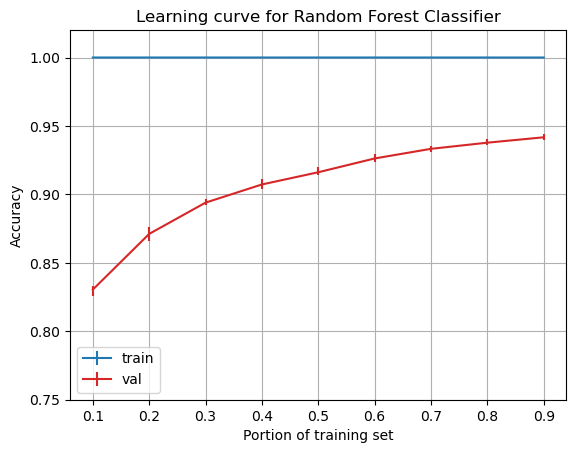

In [54]:
plt.figure()

plt.errorbar(
    [train_size for train_size in np.arange(0.1, 1.0, 0.1)], # x-location of each error bar
    [info_accuracy_train[i][0] for i in range(len(info_accuracy_train))], # y-location of each error bar
    # the size of each error bar
    yerr = [
        [info_accuracy_train[i][0]-info_accuracy_train[i][1] for i in range(len(info_accuracy_train))], 
        [info_accuracy_train[i][2]-info_accuracy_train[i][0] for i in range(len(info_accuracy_train))]
    ],
    color='tab:blue',
    label='train'
)

plt.errorbar(
    [train_size for train_size in np.arange(0.1, 1.0, 0.1)], # x-location of each error bar
    [info_accuracy_val[i][0] for i in range(len(info_accuracy_val))], # y-location of each error bar
    # the size of each error bar
    yerr = [
        [info_accuracy_val[i][0]-info_accuracy_val[i][1] for i in range(len(info_accuracy_val))], 
        [info_accuracy_val[i][2]-info_accuracy_val[i][0] for i in range(len(info_accuracy_val))]
    ],
    color='tab:red',
    label='val'
)
plt.grid()
plt.xlabel('Portion of training set')
plt.ylabel('Accuracy')
plt.title("Learning curve for Random Forest Classifier")
plt.xticks(np.arange(0.1, 1.0, 0.1), labels = np.arange(0.1, 1.0, 0.1).round(1))
#plt.scatter(best_proportion, best_val_score, marker='o', color='black',s=100)
#plt.text(best_proportion, best_val_score, "Best Proportion", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
plt.ylim(0.75, 1.02)
plt.legend()
plt.show()

###  Test your best model on unseen data

In [55]:
best_combination

{'max_features': 37, 'n_estimators': 110}

In [56]:
%%time
rf_final = RandomForestClassifier(
    ####---best parameters---###
    n_estimators = best_combination['n_estimators'],
    max_features = best_combination['max_features']
)

rf_final.fit(X_s, y)
predictions_val = rf_final.predict(X_val_s)
predictions_test = rf_final.predict(X_test_s)

CPU times: user 2min 52s, sys: 32 ms, total: 2min 52s
Wall time: 2min 52s


	CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (VAL-SET):
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     10525
           1       0.98      0.96      0.97      1152
           2       0.98      0.95      0.96       397
           3       0.95      0.92      0.94       424
           4       0.98      0.93      0.95       847
           5       0.94      0.86      0.90       952
           6       0.97      0.94      0.95      1022
           7       0.99      0.95      0.97       393
           8       0.97      0.88      0.92       561
           9       1.00      0.99      0.99      1037
          10       0.97      0.92      0.95      1166
          11       0.96      0.96      0.96      1281
          12       0.94      0.97      0.96      3343
          13       0.94      0.92      0.93       655
          14       0.83      0.73      0.78      1691
          15       0.95      0.83      0.88       590
          16       0.9

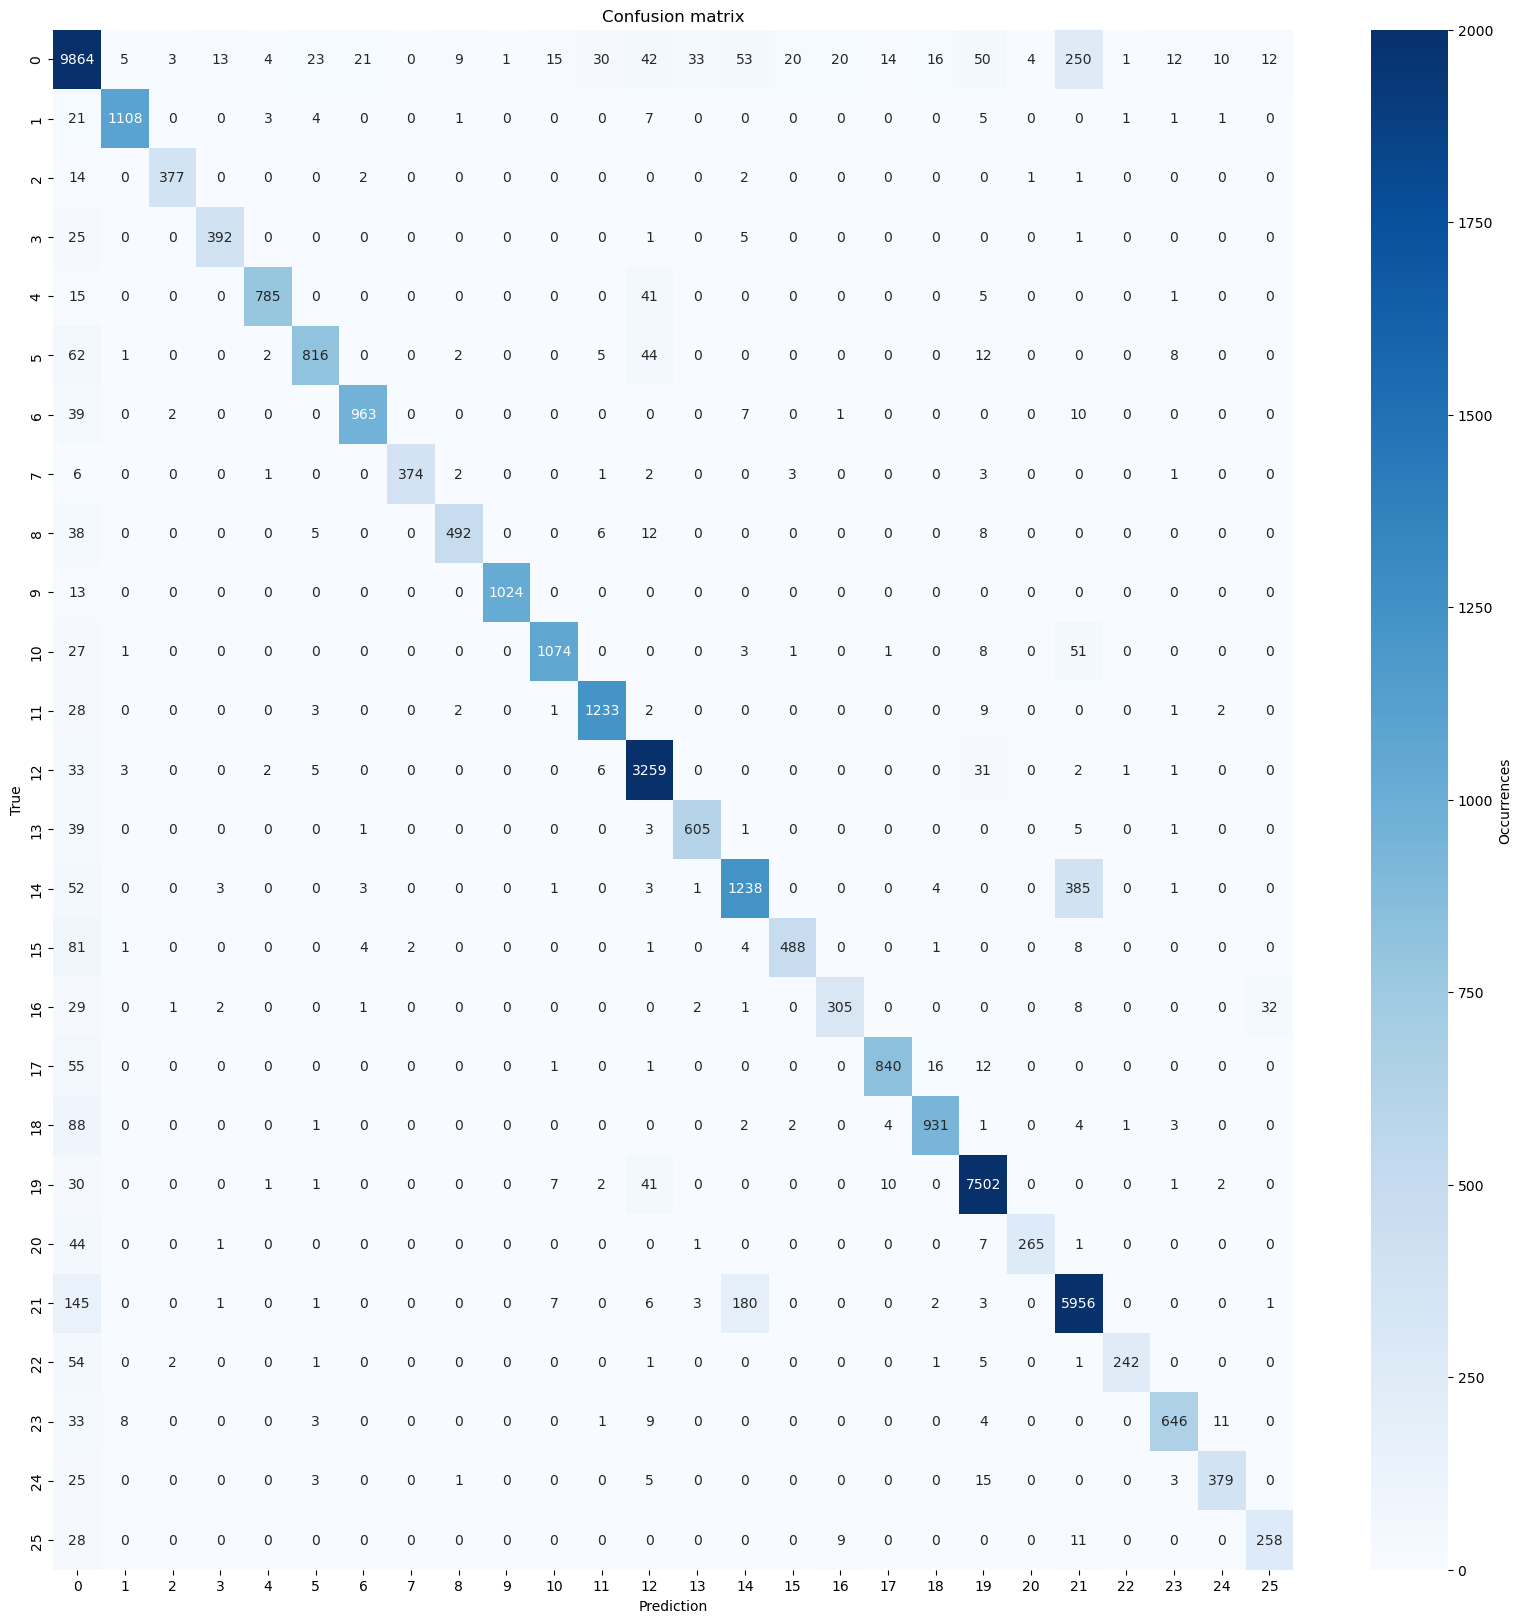

In [57]:
###--- RANDOM FOREST CLASSIFIER (VAL_SET) ---###
print("\tCLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (VAL-SET):")


# get the confusion matrix of test set
confusion_test = confusion_matrix(y_val, predictions_val)
print(classification_report(y_val, predictions_val))

# visualize the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(confusion_test, 
            cmap='Blues', 
            annot=True,
            fmt='d',
            cbar_kws={'label':'Occurrences'}, 
            vmin=0, 
            vmax=2000,
           )
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix - validation set')
plt.show()

	CLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (TEST-SET):
              precision    recall  f1-score   support

           0       0.84      0.83      0.83     34777
           1       0.95      0.90      0.92      2942
           2       0.80      0.90      0.85      1135
           3       0.94      0.94      0.94      1717
           4       0.93      0.88      0.91      2383
           5       0.85      0.68      0.76      3246
           6       0.94      0.89      0.91      2894
           7       0.98      0.81      0.89       686
           8       0.91      0.68      0.78      1455
           9       0.66      0.94      0.77      1607
          10       0.92      0.87      0.89      1730
          11       0.83      0.90      0.86      4477
          12       0.89      0.94      0.91     11171
          13       0.88      0.83      0.86      1604
          14       0.72      0.70      0.71      4426
          15       0.90      0.69      0.78      1542
          16       0.

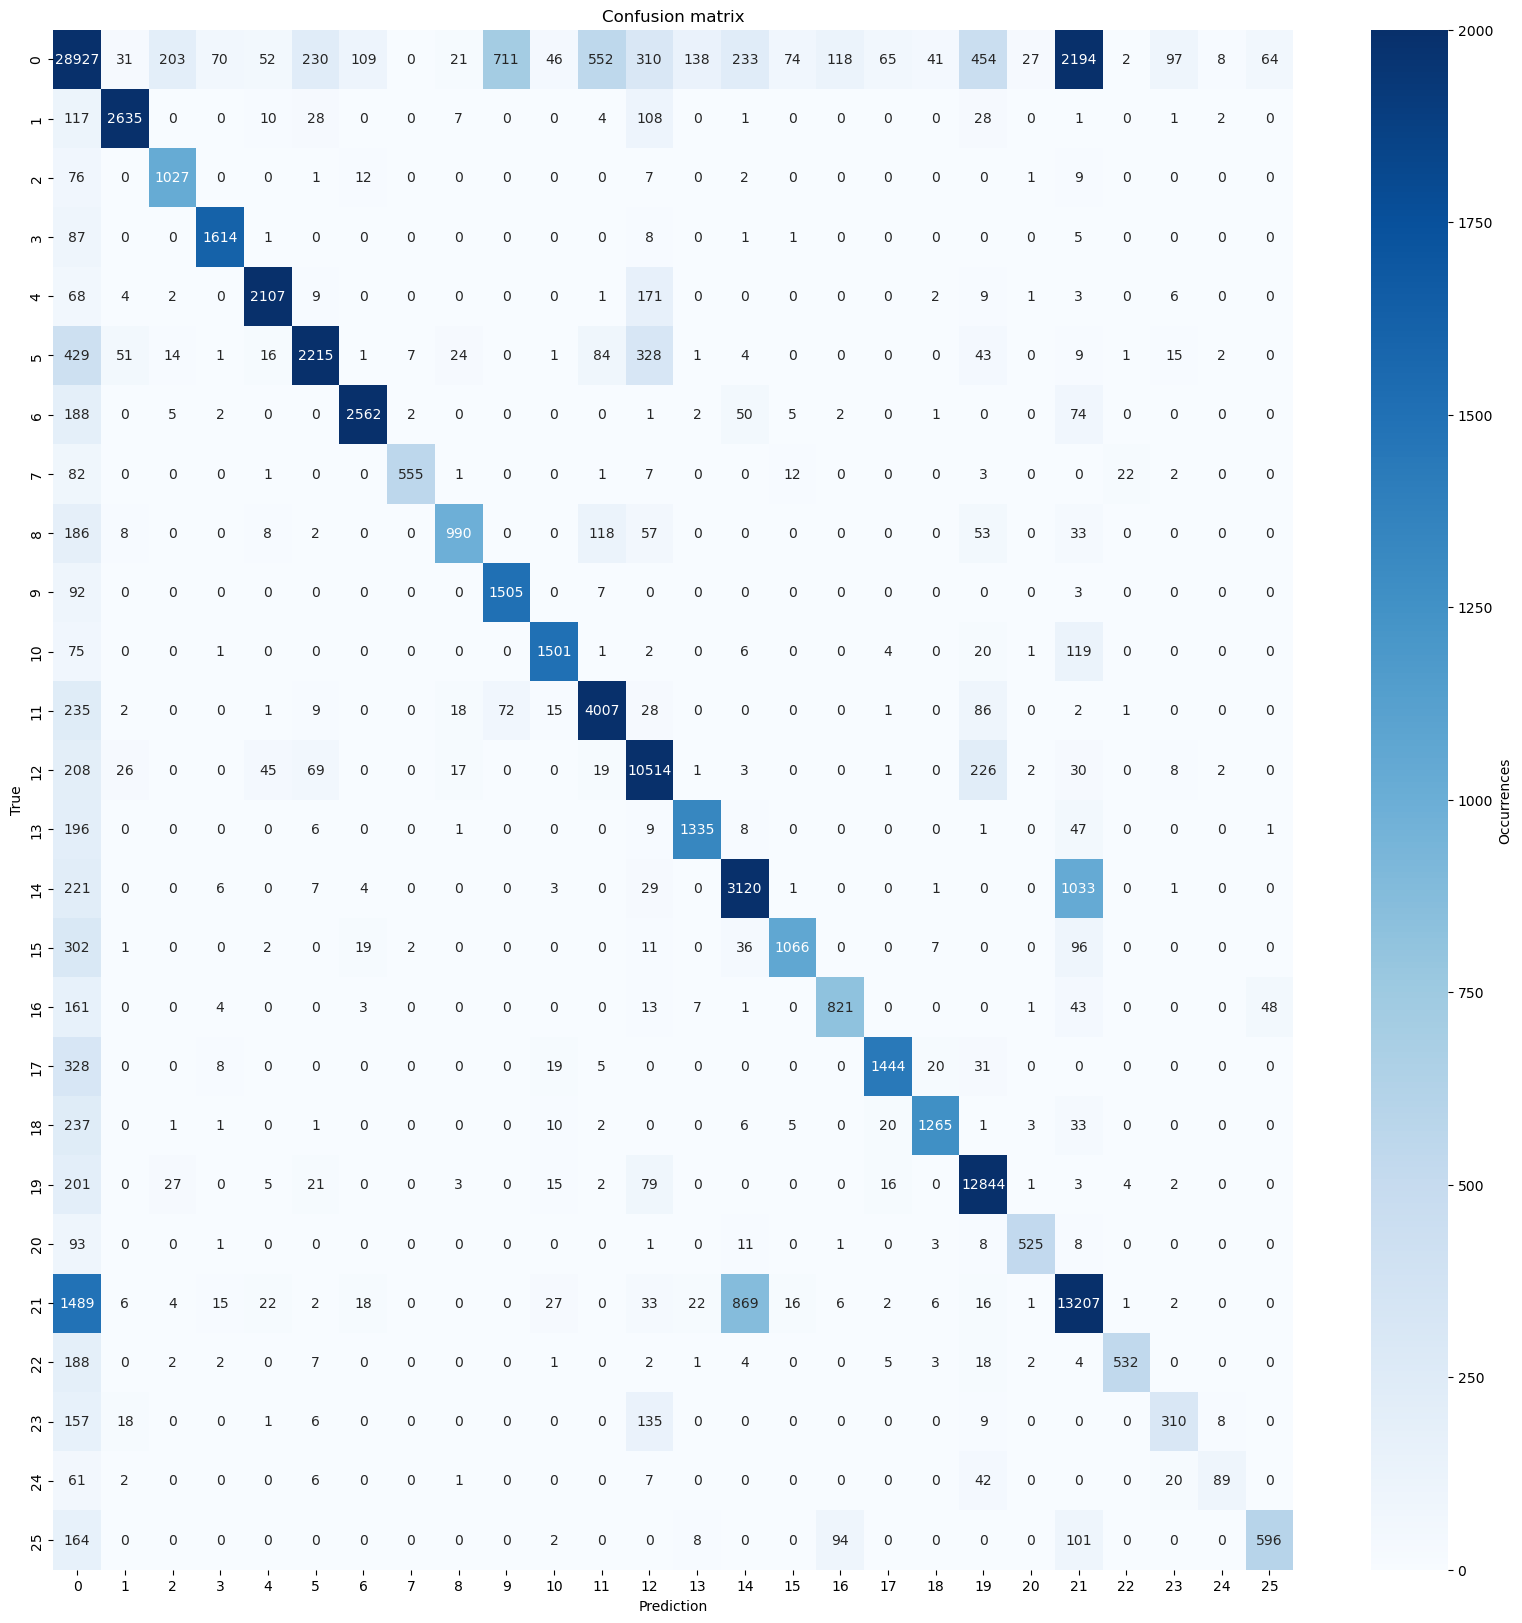

In [58]:
###--- RANDOM FOREST CLASSIFIER (TEST_SET) ---###
print("\tCLASSIFICATION REPORT RANDOM FOREST CLASSIFIER (TEST-SET):")
print(classification_report(y_test, predictions_test))

# get the confusion matrix of test set
confusion_test = confusion_matrix(y_test, predictions_test)

# visualize the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(confusion_test, 
            cmap='Blues', 
            annot=True,
            fmt='d',
            cbar_kws={'label':'Occurrences'}, 
            vmin=0, 
            vmax=2000,
           )
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix - test set')
plt.show()